# Procesamiento de Imágenes - Trabajo Práctico N°5
## Grupo 3
* Santiago Arribere
* Matías Francois
* Joaquín Gaytan
* Pablo Scheinfeld

# Ejercicio 3 - Blind Deconvolution


La deconvolución ciega de imágenes es el problema de recuperar una imagen nítida a partir de una imagen borrosa y con ruido, sin saber exactamente cómo se ha borrado la imagen. Richardson Lucy es el algoritmo de deconvolución más utilizado, funciona bien en la mayoría de los casos, especialmente si el ruido es relativamente bajo. Este algoritmo recibe una psf estimada a fin de realizar la restauración.


Los algoritmos de restauración de imágenes lineales existentes asumen que la PSF es conocida a priori e intentan invertirla y reducir el ruido utilizando cantidades variables de información sobre la PSF, la imagen real y las estadísticas del ruido. 

Sin embargo, en muchas situaciones, la PSF es desconocida y es poco lo que se puede suponer de la imagen original. Por lo tanto, la mayoría de las técnicas de restauración lineal de imágenes existentes no son aplicables para resolver este tipo de problemas. El proceso de estimar simultáneamente la PSF y restaurar una imagen desconocida utilizando información parcial o nula sobre el sistema de imágenes se conoce como restauración ciega de imágenes.

En la práctica, se requiere cierta información a priori para restaurar la imagen con éxito. La información parcial disponible es específica de cada aplicación de imagen. El reto consiste en diseñar un método que presente el compromiso más adecuado entre complejidad computacional, fiabilidad, robustez al ruido y portabilidad para una aplicación determinada.




In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from PIL import Image
from skimage import color, data, restoration
import sys
# Add the folder path to the sys.path list
sys.path.append('../../src/helpers/')
from mse import mse
from add_noise import add_noise
from blur_img import blur_img

(512, 512)


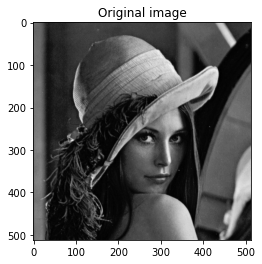

In [11]:
# Open image
img = np.array(Image.open('../../assets/lenagray.tif').convert('L'))

# Plot image
plt.title('Original image')
plt.imshow(img, cmap='gray');
print(img.shape)

### Blur

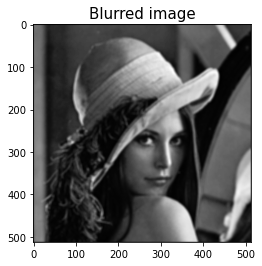

noise variance = 536.03


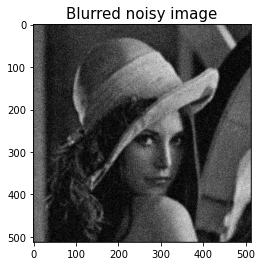

MSE = 571.0718572165329


In [12]:
kernel_size = 6
lpf = np.ones((kernel_size, kernel_size)) / kernel_size ** 2
blurred_img = blur_img(img, lpf)
noisy_blurred_img, _ = add_noise(blurred_img, 65, 'Blurred noisy image')
print(f'MSE = {mse(img, np.abs(noisy_blurred_img))}')

### Deconvolución

MSE = 145.68640845211127


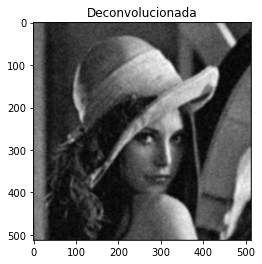

In [13]:
psf = np.ones((5, 5)) / 5 # Se estima una psf de todos unos.

deconv = restoration.richardson_lucy(noisy_blurred_img.astype(np.float64)/255.0, psf, iterations=1)*255
plt.title('Deconvolucionada')
plt.imshow(deconv, cmap='gray');
print(f'MSE = {mse(img, np.abs(deconv))}')
